In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('interview.csv')
df.head(3)

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(1234, 28)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 28 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                   

In [5]:
df.columns

Index(['Date of Interview', 'Client name', 'Industry', 'Location',
       'Position to be closed', 'Nature of Skillset', 'Interview Type',
       'Name(Cand ID)', 'Gender', 'Candidate Current Location',
       'Candidate Job Location', 'Interview Venue',
       'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unname

### Delete the insignificant columns

In [6]:
df.drop(['Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'], axis=1, inplace=True)

In [7]:
df.shape

(1234, 23)

In [8]:
df.drop(['Date of Interview', 'Name(Cand ID)'], axis=1, inplace=True)    #Insignicant info

In [9]:
df.shape

(1234, 21)

In [10]:
df.head()
df.columns

Index(['Client name', 'Industry', 'Location', 'Position to be closed',
       'Nature of Skillset', 'Interview Type', 'Gender',
       'Candidate Current Location', 'Candidate Job Location',
       'Interview Venue', 'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 21 columns):
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Gender                                                                                                1233 non-null object
Candidate Current Location      

## Data Munging

In [12]:
df['Client name'].unique()

array(['Hospira', 'Aon Hewitt', 'UST', 'Standard Chartered Bank', 'ANZ',
       'Pfizer', 'Standard Chartered Bank Chennai', 'Aon hewitt Gurgaon',
       'Astrazeneca', 'Flextronics', 'Prodapt', 'Williams Lea',
       'Barclays', 'Hewitt', 'Woori Bank', '\ufeff\ufeff'], dtype=object)

In [13]:
df.index[(df['Client name'] == '\ufeff\ufeff')]
df.drop(df.index[(df['Client name'] == '\ufeff\ufeff')], inplace = True, axis = 0) 
df['Client name'].replace(  to_replace=[ 'Aon Hewitt', 'Aon hewitt Gurgaon', 'Hewitt'],value='IT', inplace=True)
df['Client name'].replace(  to_replace=['Standard Chartered Bank', 'Standard Chartered Bank Chennai'],value='Standard Chartered Bank', inplace=True)
df['Client name'].value_counts()

Standard Chartered Bank    921
Hospira                     75
Pfizer                      75
IT                          50
Flextronics                 23
ANZ                         22
UST                         18
Prodapt                     17
Astrazeneca                 15
Williams Lea                11
Barclays                     5
Woori Bank                   1
Name: Client name, dtype: int64

In [14]:
df['Industry'].unique()

array(['Pharmaceuticals', 'IT Services', 'BFSI',
       'IT Products and Services', 'Electronics', 'Telecom', 'IT'],
      dtype=object)

In [15]:
df['Industry'].replace(  to_replace=['IT Services', 'IT Products and Services', 'IT'],value='IT', inplace=True)
df['Industry'].value_counts()

BFSI               949
Pharmaceuticals    165
IT                  79
Electronics         23
Telecom             17
Name: Industry, dtype: int64

In [16]:
df['Location'].unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Gurgaonr',
       'Delhi', 'chennai', '- Cochin- ', 'Noida', 'CHENNAI', 'chennai '],
      dtype=object)

Fix the spellings

In [17]:
df['Location'].replace(  to_replace=['Gurgaonr','Delhi', 'Noida'],value='Gurgaon', inplace=True)  #Grouping Delhi Noida Gurgaon
df['Location'].replace(  to_replace=['CHENNAI', 'chennai ','chennai'],value='Chennai', inplace=True)
df['Location'].unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', '- Cochin- '],
      dtype=object)

In [18]:
df.columns

Index(['Client name', 'Industry', 'Location', 'Position to be closed',
       'Nature of Skillset', 'Interview Type', 'Gender',
       'Candidate Current Location', 'Candidate Job Location',
       'Interview Venue', 'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status'],
      dtype='object')

In [19]:
df['Position to be closed'].unique()

array(['Production- Sterile', 'Selenium testing', 'Dot Net', 'AML',
       'Trade Finance', 'Routine', 'Niche'], dtype=object)

In [20]:
df['Nature of Skillset'].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'CDD KYC', 'Biosimiliars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Biosimilars', 'Regulatory',
       'Analytical R & D', 'Analytical R&D',
       'Senior software engineer-Mednet', 'Tech lead-Mednet',
       'Tech Lead- Mednet', 'Technical Lead', 'Sr Automation Testing',
       'TL', 'Senior Analyst', 'production', 'Production', 'Core Java',
       'Java J2EE', 'Oracle Plsql', 'Java,SQL', 'Automation Testing Java',
       'Submission Management', 'Biosimillar', 'Publishing',
       'Global Labelling', 'ALS Testing', 'Java Developer',
       'Lending and Liabilities', 'Lending & Liability',
       'Lending And Liabilities', 'L & L', 'Banking operations',
       'Lending&Liablities', 'JAVA/J2EE/Struts/Hibernate',
       'JAVA/SPRING/HIBERNATE/JSF', 'Java', 'Java JSF', 'Java,J2ee, JSF',
       'Java ,J2ee', 'Java J

In [21]:
df[df['Nature of Skillset'].isin(['11.30 AM', '10.00 AM', '9.00 Am','12.30 Pm', '9.30 AM', '11.30 Am'])]  #Just to check the rows

,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Gender,Candidate Current Location,Candidate Job Location,Interview Venue,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
816,Standard Chartered Bank,BFSI,Chennai,Routine,11.30 AM,Scheduled Walk In,Male,chennai,Chennai,Chennai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
817,Standard Chartered Bank,BFSI,Chennai,Routine,10.00 AM,Scheduled Walk In,Male,chennai,Chennai,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Single
818,Standard Chartered Bank,BFSI,Chennai,Routine,9.00 Am,Scheduled Walk In,Female,chennai,Chennai,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Married
819,Standard Chartered Bank,BFSI,Chennai,Routine,12.30 Pm,Scheduled Walk In,Male,chennai,Chennai,Chennai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
820,Standard Chartered Bank,BFSI,Chennai,Routine,11.30 AM,Scheduled Walk In,Male,Chennai,Chennai,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
821,Standard Chartered Bank,BFSI,Chennai,Routine,9.30 AM,Scheduled Walk In,Male,Chennai,Chennai,Chennai,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Single
822,Standard Chartered Bank,BFSI,Chennai,Routine,11.30 Am,Scheduled Walk In,Male,Chennai,Chennai,Chennai,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,yes,Single


In [22]:
df['Nature of Skillset'].unique()

array(['Routine', 'Oracle', 'Accounting Operations', 'Banking Operations',
       'Fresher', 'AML/KYC/CDD', 'CDD KYC', 'Biosimiliars', 'RA Label',
       'RA Publishing', 'EMEA', 'LCM -Manager', 'Licensing – RA',
       'generic drugs – RA', 'Biosimilars', 'Regulatory',
       'Analytical R & D', 'Analytical R&D',
       'Senior software engineer-Mednet', 'Tech lead-Mednet',
       'Tech Lead- Mednet', 'Technical Lead', 'Sr Automation Testing',
       'TL', 'Senior Analyst', 'production', 'Production', 'Core Java',
       'Java J2EE', 'Oracle Plsql', 'Java,SQL', 'Automation Testing Java',
       'Submission Management', 'Biosimillar', 'Publishing',
       'Global Labelling', 'ALS Testing', 'Java Developer',
       'Lending and Liabilities', 'Lending & Liability',
       'Lending And Liabilities', 'L & L', 'Banking operations',
       'Lending&Liablities', 'JAVA/J2EE/Struts/Hibernate',
       'JAVA/SPRING/HIBERNATE/JSF', 'Java', 'Java JSF', 'Java,J2ee, JSF',
       'Java ,J2ee', 'Java J

In [23]:
df['Interview Type'].unique()

array(['Scheduled Walkin', 'Scheduled ', 'Walkin', 'Scheduled Walk In',
       'Sceduled walkin', 'Walkin '], dtype=object)

In [24]:
df['Interview Type'].replace(['Scheduled Walk In','Sceduled walkin'],'Scheduled Walkin',inplace=True)
df['Interview Type'].replace(['Walkin '],'Walkin',inplace=True)
df['Interview Type'].unique()

array(['Scheduled Walkin', 'Scheduled ', 'Walkin'], dtype=object)

In [25]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df['Candidate Current Location'].unique()

array(['Chennai', 'Gurgaon', 'Bangalore', 'Hyderabad', 'Delhi', 'chennai',
       '- Cochin- ', 'Noida', 'CHENNAI', 'chennai '], dtype=object)

In [27]:
df['Candidate Current Location'].replace(  to_replace=['CHENNAI', 'chennai ','chennai'],value='Chennai', inplace=True)
df['Candidate Current Location'].replace(  to_replace=['Gurgaonr','Delhi', 'Noida'],value='Gurgaon', inplace=True)
df['Candidate Current Location'].value_counts()

Chennai       844
Bangalore     292
Gurgaon        50
Hyderabad      38
- Cochin-       9
Name: Candidate Current Location, dtype: int64

In [28]:
df['Candidate Job Location'].unique()

array(['Hosur', 'Bangalore', 'Chennai', 'Gurgaon', 'Visakapatinam',
       '- Cochin- ', 'Noida'], dtype=object)

In [29]:
df['Candidate Job Location'].replace(  to_replace=['Gurgaonr','Delhi', 'Noida'],value='Gurgaon', inplace=True)
df['Candidate Job Location'].replace(  to_replace=['Hosur'],value='Bangalore', inplace=True)
df['Candidate Job Location'].value_counts()

Chennai          893
Bangalore        260
Gurgaon           50
Visakapatinam     21
- Cochin-          9
Name: Candidate Job Location, dtype: int64

In [30]:
df['Interview Venue'].unique()

array(['Hosur', 'Gurgaon', 'Bangalore', 'Chennai', 'Hyderabad',
       '- Cochin- ', 'Noida'], dtype=object)

In [31]:
df['Interview Venue'].replace(  to_replace=['Hosur'],value='Bangalore', inplace=True)
df['Interview Venue'].replace(  to_replace=['Gurgaonr','Delhi', 'Noida'],value='Gurgaon', inplace=True)
df['Interview Venue'].value_counts()

Chennai       852
Bangalore     282
Gurgaon        50
Hyderabad      40
- Cochin-       9
Name: Interview Venue, dtype: int64

In [32]:
df['Candidate Native location'].unique()

array(['Hosur', 'Trichy', 'Chennai', 'Gurgaon', 'Noida', 'Delhi /NCR',
       'Cochin', 'Trivandrum', 'Bangalore', 'Coimbatore', 'Salem',
       'Tanjore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Allahabad',
       'Panjim', 'Cuttack', 'Visakapatinam', 'Belgaum', 'Patna',
       'Chitoor', 'Anantapur', 'Warangal', 'Ahmedabad', 'Kurnool',
       'Vijayawada', 'Vellore', 'Pondicherry', 'Nagercoil', 'Agra',
       'Bhubaneshwar', 'Ghaziabad', 'Baddi', 'Tuticorin', 'Tirupati',
       'Faizabad', 'Ambur', 'Chandigarh', 'Mysore', 'Hissar', 'Delhi',
       'Kanpur', 'Lucknow', '- Cochin- '], dtype=object)

In [33]:
df['Candidate Native location'].replace(  to_replace=['Gurgaonr','Delhi', 'Noida','Delhi /NCR'],value='Gurgaon', inplace=True)
df['Candidate Native location'].replace(  to_replace=['Hosur'],value='Bangalore', inplace=True)
df['Candidate Native location'].unique()

array(['Bangalore', 'Trichy', 'Chennai', 'Gurgaon', 'Cochin',
       'Trivandrum', 'Coimbatore', 'Salem', 'Tanjore', 'Hyderabad',
       'Mumbai', 'Pune', 'Kolkata', 'Allahabad', 'Panjim', 'Cuttack',
       'Visakapatinam', 'Belgaum', 'Patna', 'Chitoor', 'Anantapur',
       'Warangal', 'Ahmedabad', 'Kurnool', 'Vijayawada', 'Vellore',
       'Pondicherry', 'Nagercoil', 'Agra', 'Bhubaneshwar', 'Ghaziabad',
       'Baddi', 'Tuticorin', 'Tirupati', 'Faizabad', 'Ambur',
       'Chandigarh', 'Mysore', 'Hissar', 'Kanpur', 'Lucknow',
       '- Cochin- '], dtype=object)

In [34]:
df['Have you obtained the necessary permission to start at the required time'].unique()

array(['Yes', nan, 'No', 'Not yet', 'Yet to confirm', 'NO', 'yes', 'Na'],
      dtype=object)

In [35]:
df['Have you obtained the necessary permission to start at the required time'].replace(  to_replace=['yes'],value='Yes', inplace=True)
df['Have you obtained the necessary permission to start at the required time'].replace(  to_replace=['No', 'NO',],value='No', inplace=True)
df['Have you obtained the necessary permission to start at the required time'].replace(  to_replace=['Not yet', 'Yet to confirm'],value='Not yet', inplace=True)
df['Have you obtained the necessary permission to start at the required time'].value_counts()

Yes        921
No          80
Not yet     23
Na           5
Name: Have you obtained the necessary permission to start at the required time, dtype: int64

In [36]:
#To view the Nan
df.loc[df['Have you obtained the necessary permission to start at the required time'].isin(['Yes', 'No', 'Not yet', 'Na'])==False]

,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Gender,Candidate Current Location,Candidate Job Location,Interview Venue,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
2,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Male,Chennai,Chennai,Bangalore,...,NaN,Na,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
242,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Male,Bangalore,Bangalore,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
244,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Male,Bangalore,Bangalore,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
245,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Male,Bangalore,Bangalore,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Married
247,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Female,Bangalore,Bangalore,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
248,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Female,Bangalore,Bangalore,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
251,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Male,Bangalore,Bangalore,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single
254,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Male,Bangalore,Bangalore,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
255,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Male,Bangalore,Bangalore,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,No,Single
260,Standard Chartered Bank,BFSI,Bangalore,Routine,AML/KYC/CDD,Scheduled Walkin,Male,Bangalore,Bangalore,Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uncertain,Yes,Single


Replace NAN by Na

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 21 columns):
Client name                                                                                           1233 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Gender                                                                                                1233 non-null object
Candidate Current Location      

In [38]:
df['Hope there will be no unscheduled meetings'].unique()

array(['Yes', 'Na', 'No', nan, 'yes', 'Not Sure', 'cant Say', 'Not sure'],
      dtype=object)

In [39]:
df['Hope there will be no unscheduled meetings'].fillna('Na', inplace=True)
df['Hope there will be no unscheduled meetings'].replace(['Yes', 'yes'],'Yes', inplace=True)
df['Hope there will be no unscheduled meetings'].replace(['Not Sure', 'cant Say', 'Not sure'],'Not sure', inplace=True)
df['Hope there will be no unscheduled meetings'].value_counts()

Yes         954
Na          267
Not sure      6
No            6
Name: Hope there will be no unscheduled meetings, dtype: int64

In [40]:
df['Can I Call you three hours before the interview and follow up on your attendance for the interview'].unique()

array(['Yes', nan, 'No', 'No Dont', 'Na', 'yes'], dtype=object)

In [41]:
df['Can I Call you three hours before the interview and follow up on your attendance for the interview'].fillna('Na', inplace=True)
df['Can I Call you three hours before the interview and follow up on your attendance for the interview'].replace(['Yes','yes'],'Yes', inplace=True)
df['Can I Call you three hours before the interview and follow up on your attendance for the interview'].replace(['No','No Dont'],'No', inplace=True)
df['Can I Call you three hours before the interview and follow up on your attendance for the interview'].value_counts()

Yes    955
Na     267
No      11
Name: Can I Call you three hours before the interview and follow up on your attendance for the interview, dtype: int64

In [42]:
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'].unique()

array(['Yes', nan, 'No', 'No I have only thi number', 'na', 'yes', 'Na'],
      dtype=object)

In [43]:
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'].fillna('Na', inplace=True)
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'].replace(['Yes','yes'],'Yes', inplace=True)
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'].replace(['No', 'No I have only thi number'],'No', inplace=True)
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'].replace(['Na','na'],'Na', inplace=True)
df['Can I have an alternative number/ desk number. I assure you that I will not trouble you too much'].value_counts()

Yes    937
Na     267
No      29
Name: Can I have an alternative number/ desk number. I assure you that I will not trouble you too much, dtype: int64

In [44]:
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'].unique()

array(['Yes', nan, 'No', 'No- will take it soon', 'Not yet', 'na', 'yes',
       'Na', 'Not Yet'], dtype=object)

In [45]:
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'].fillna('Na', inplace=True)
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'].replace(['Yes','yes'],'Yes', inplace=True)
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'].replace(['No', 'No- will take it soon','Not yet','Not Yet'],'No', inplace=True)
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'].replace(['Na','na'],'Na', inplace=True)
df['Have you taken a printout of your updated resume. Have you read the JD and understood the same'].value_counts()

Yes    942
Na     268
No      23
Name: Have you taken a printout of your updated resume. Have you read the JD and understood the same, dtype: int64

In [46]:
df['Are you clear with the venue details and the landmark.'].unique()

array(['Yes', nan, 'No', 'No- I need to check', 'na', 'yes', 'Na', 'no'],
      dtype=object)

In [47]:
df['Are you clear with the venue details and the landmark.'].fillna('Na', inplace=True)
df['Are you clear with the venue details and the landmark.'].replace(['Yes','yes'],'Yes', inplace=True)
df['Are you clear with the venue details and the landmark.'].replace(['No', 'No- I need to check','no'],'No', inplace=True)
df['Are you clear with the venue details and the landmark.'].replace(['Na','na'],'Na', inplace=True)
df['Are you clear with the venue details and the landmark.'].value_counts()

Yes    948
Na     268
No      17
Name: Are you clear with the venue details and the landmark., dtype: int64

In [48]:
df['Has the call letter been shared'].unique()

array(['Yes', nan, 'Havent Checked', 'No', 'Need To Check', 'Not sure',
       'Yet to Check', 'Not Sure', 'Not yet', 'no', 'na', 'yes', 'Na'],
      dtype=object)

In [49]:
df['Has the call letter been shared'].fillna('Na', inplace=True)
df['Has the call letter been shared'].replace(['Yes','yes'],'Yes', inplace=True)
df['Has the call letter been shared'].replace(['No', 'No- I need to check','no'],'No', inplace=True)
df['Has the call letter been shared'].replace(['Havent Checked', 'Need To Check', 'Not sure','Yet to Check', 'Not Sure', 'Not yet'],'Not sure', inplace=True)
df['Has the call letter been shared'].replace(['Na','na'],'Na', inplace=True)
df['Has the call letter been shared'].value_counts()

Yes         934
Na          265
No           18
Not sure     16
Name: Has the call letter been shared, dtype: int64

In [50]:
df['Expected Attendance'].unique()

array(['Yes', 'Uncertain', 'No', 'NO', 'yes', nan, '11:00 AM', '10.30 Am'],
      dtype=object)

In [51]:
df['Expected Attendance'].fillna('Uncertain', inplace=True)
df['Expected Attendance'].replace(['Yes','yes','yes ','11:00 AM', '10.30 Am'],'Yes', inplace=True)
df['Expected Attendance'].replace(['No',  'no', 'No ', 'NO', 'no '],'No', inplace=True)
df['Expected Attendance'].value_counts()

Yes          885
Uncertain    255
No            93
Name: Expected Attendance, dtype: int64

In [52]:
df['Observed Attendance'].value_counts()

Yes     701
No      401
yes      81
NO       35
no        7
No        6
no        1
yes       1
Name: Observed Attendance, dtype: int64

In [53]:
df['Observed Attendance'].fillna('Na', inplace=True)
df['Observed Attendance'].replace(['Yes','yes','yes '],0, inplace=True)
df['Observed Attendance'].replace(['No',  'no', 'No ', 'NO', 'no '],1, inplace=True)
df['Observed Attendance'].value_counts()
# What we observe here is class 0 & 1 are little imbalanced 36.5% has not attended the interview

0    783
1    450
Name: Observed Attendance, dtype: int64

In [54]:
df.shape

(1233, 21)

## Now Data Pre-Processing for Modelling

In [55]:
df1=pd.get_dummies(df.drop('Observed Attendance',axis=1), drop_first=True)

In [56]:
df.shape

(1233, 21)

In [57]:
df1.shape

(1233, 192)

In [58]:
df1.head()

,Client name_Astrazeneca,Client name_Barclays,Client name_Flextronics,Client name_Hospira,Client name_IT,Client name_Pfizer,Client name_Prodapt,Client name_Standard Chartered Bank,Client name_UST,Client name_Williams Lea,...,Have you taken a printout of your updated resume. Have you read the JD and understood the same_No,Have you taken a printout of your updated resume. Have you read the JD and understood the same_Yes,Are you clear with the venue details and the landmark._No,Are you clear with the venue details and the landmark._Yes,Has the call letter been shared_No,Has the call letter been shared_Not sure,Has the call letter been shared_Yes,Expected Attendance_Uncertain,Expected Attendance_Yes,Marital Status_Single
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1,0,0


In [59]:
df2=pd.concat([df1,df['Observed Attendance']], axis=1)

In [60]:
df2.head(2)

,Client name_Astrazeneca,Client name_Barclays,Client name_Flextronics,Client name_Hospira,Client name_IT,Client name_Pfizer,Client name_Prodapt,Client name_Standard Chartered Bank,Client name_UST,Client name_Williams Lea,...,Have you taken a printout of your updated resume. Have you read the JD and understood the same_Yes,Are you clear with the venue details and the landmark._No,Are you clear with the venue details and the landmark._Yes,Has the call letter been shared_No,Has the call letter been shared_Not sure,Has the call letter been shared_Yes,Expected Attendance_Uncertain,Expected Attendance_Yes,Marital Status_Single,Observed Attendance
0,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,1
1,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,1,1,1


In [61]:
x = df2.drop(['Observed Attendance'], axis=1)
y = df2['Observed Attendance']

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

## Lets start modelling with KNN

In [63]:
pd.options.display.float_format = '{:.2f}'.format
for i in range(1,50):
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    #print(confusion_matrix(y_test,pred))
    #print(classification_report(y_test,pred))
    print(i,accuracy_score(y_test,pred))

1 0.5918918918918918
2 0.6486486486486487
3 0.6243243243243243
4 0.6567567567567567
5 0.6702702702702703
6 0.654054054054054
7 0.6459459459459459
8 0.654054054054054
9 0.6567567567567567
10 0.672972972972973
11 0.6756756756756757
12 0.6810810810810811
13 0.6756756756756757
14 0.6783783783783783
15 0.6810810810810811
16 0.6675675675675675
17 0.6702702702702703
18 0.6675675675675675
19 0.6567567567567567
20 0.6756756756756757
21 0.6702702702702703
22 0.6702702702702703
23 0.6783783783783783
24 0.6756756756756757
25 0.6702702702702703
26 0.6648648648648648
27 0.6783783783783783
28 0.6702702702702703
29 0.6702702702702703
30 0.6756756756756757
31 0.6756756756756757
32 0.6675675675675675
33 0.6702702702702703
34 0.6675675675675675
35 0.6702702702702703
36 0.672972972972973
37 0.6783783783783783
38 0.6702702702702703
39 0.6837837837837838
40 0.6702702702702703
41 0.6891891891891891
42 0.6810810810810811
43 0.6810810810810811
44 0.6918918918918919
45 0.7
46 0.6945945945945946
47 0.68108108108

In [64]:
from sklearn.model_selection import RandomizedSearchCV
par={'n_neighbors': list(range(1,60)), 'weights' :['distance','uniform']}
RDSCV = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=par,n_jobs=-1, cv=4)
RDSCV.fit(X_train,y_train)
pred = RDSCV.predict(X_test)
params = RDSCV.best_params_
score = RDSCV.best_score_
print(params,score)

{'weights': 'uniform', 'n_neighbors': 20} 0.6825096899224806


In [65]:
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=45)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    from sklearn.metrics import classification_report,confusion_matrix
    print('Accuracy Score: ',accuracy_score(y_test,pred))
    pd.options.display.float_format = '{:.2f}'.format

Accuracy Score:  0.7


In [66]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       233
           1       0.74      0.29      0.42       137

    accuracy                           0.70       370
   macro avg       0.72      0.62      0.61       370
weighted avg       0.71      0.70      0.66       370

[[219  14]
 [ 97  40]]


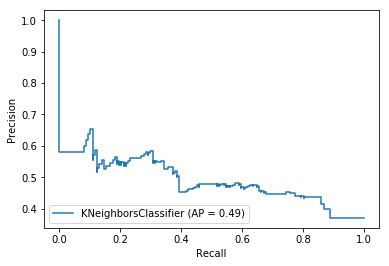

In [67]:
#print("AUC: %.3f (%.3f)") % (pred.mean(), pred.std())
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
metrics.auc(fpr, tpr)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

classifier = KNeighborsClassifier(n_neighbors=45,weights='distance')
classifier.fit(X_train, y_train)
disp = plot_precision_recall_curve(classifier, X_test, y_test)

## Lets try Support Vector Machines Classifier SVC

In [68]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,predictions))

Accuracy Score:  0.7216216216216216


In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,0.1,1, 10, 100], 'gamma': [10,1,0.1,0.01,0.001], 'kernel':['linear','poly','rbf']} 
grid = GridSearchCV(SVC(),param_grid,verbose=0, cv=5)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,grid_predictions))


Accuracy Score:  0.7216216216216216


In [70]:
grid.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}

In [71]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       233
           1       0.74      0.29      0.42       137

    accuracy                           0.70       370
   macro avg       0.72      0.62      0.61       370
weighted avg       0.71      0.70      0.66       370

[[219  14]
 [ 97  40]]


## Finally Lets Model it with Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
LRpred = LR.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,LRpred))

Accuracy:  0.7243243243243244


C:\Users\m0092071\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(penalty='l2',C=0.2)
LR.fit(X_train,y_train)
LRpred = LR.predict(X_test)
print('Accuracy: ',accuracy_score(y_test,LRpred))

Accuracy:  0.7216216216216216


In [74]:
print(classification_report(y_test,LRpred))
print(confusion_matrix(y_test,LRpred))
print('Accuracy: ',accuracy_score(y_test,LRpred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       233
           1       0.77      0.36      0.49       137

    accuracy                           0.72       370
   macro avg       0.74      0.65      0.65       370
weighted avg       0.73      0.72      0.69       370

[[218  15]
 [ 88  49]]
Accuracy:  0.7216216216216216


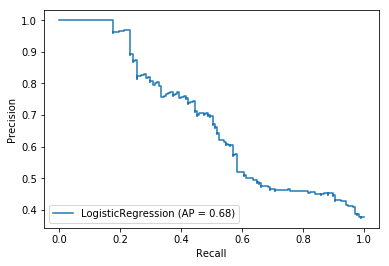

In [75]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, LRpred)
metrics.auc(fpr, tpr)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

classifier = LogisticRegression(penalty='l2',C=0.2)
classifier.fit(X_train, y_train)
disp = plot_precision_recall_curve(classifier, X_test, y_test)

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,.2,.4,.9,1,10] , 'penalty':['l2'],'solver':['liblinear','newton-cg','saga','lbfgs']}
grid = GridSearchCV(LogisticRegression(),param_grid,cv=10,)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print('Accuracy Score: ',accuracy_score(y_test,grid_predictions))

C:\Users\m0092071\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\m0092071\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\m0092071\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

C:\Users\m0092071\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\m0092071\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

Accuracy Score:  0.7189189189189189


C:\Users\m0092071\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\m0092071\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-l

In [77]:
print("Avg Accuracy: ",grid.best_score_ ,"  Parameters: ", grid.best_params_)

Avg Accuracy:  0.6941726811013098   Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [78]:
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))
print('Accuracy: ',accuracy_score(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       233
           1       0.76      0.35      0.48       137

    accuracy                           0.72       370
   macro avg       0.74      0.64      0.64       370
weighted avg       0.73      0.72      0.69       370

[[218  15]
 [ 89  48]]
Accuracy:  0.7189189189189189


In [79]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(LogisticRegression(penalty='l2',C=0.2), X_train,y_train, cv=8)
cv_results['test_score'].mean()

0.6860613534094843

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_estimators = 15,max_depth=5,
                            random_state=0).fit(X_train, y_train)

parameters = {'n_estimators':[320,430,540],'max_depth':[8, 9, 10, 11, 12],'criterion' :['gini','entropy'],'max_features': ['auto', 'sqrt', 'log2']}
clf = GridSearchCV(RandomForestClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(X_train,y_train)

print(clf.score(X_train,y_train))
print(clf.best_params_)

0.7879490150637312
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'log2', 'n_estimators': 540}


In [81]:
RFPred=clf.predict(X_test)
print(classification_report(y_test,RFPred))
print(confusion_matrix(y_test,RFPred))
print('Accuracy: ',accuracy_score(y_test,RFPred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       233
           1       0.70      0.33      0.45       137

    accuracy                           0.70       370
   macro avg       0.70      0.62      0.62       370
weighted avg       0.70      0.70      0.67       370

[[214  19]
 [ 92  45]]
Accuracy:  0.7


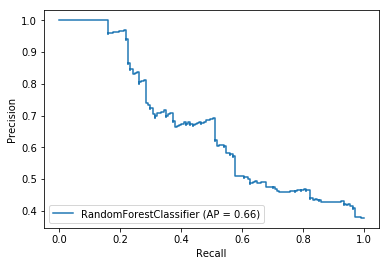

In [82]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, RFPred)
metrics.auc(fpr, tpr)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

classifier = RandomForestClassifier(random_state=0,criterion='gini', max_depth=11, max_features='log2', n_estimators=320)
classifier.fit(X_train, y_train)
disp = plot_precision_recall_curve(classifier, X_test, y_test)